# Dataset `loria` visualization

## Connection to GoogleDrive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Library installation

In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 18.3 MB/s eta 0:00:00


## Import of the `loria` dataset



In [ ]:
import datasets
miam= '/content/drive/MyDrive/ANLP/projet_anlp/miam.py'

dataset = datasets.load_dataset('miam', 'loria')

Generating train split:   0%|          | 0/8465 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/942 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1047 [00:00<?, ? examples/s]

Dataset miam downloaded and prepared to /root/.cache/huggingface/datasets/miam/loria/1.0.0/3cb25c5337f9e60db1dc6d90344763a6ef79d7a4ac3c5f215ce6e8afe99db26c. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

## Dataset `loria` visualization

In [ ]:
dataset['train'][2]

{'Speaker': 'Ben',
 'Utterance': "Où est l'entreprise qu'on cherche ?",
 'Dialogue_Act': 'help',
 'Dialogue_ID': '0',
 'File_ID': 'Dial_20110615_105040',
 'Label': 6,
 'Idx': 2}

In [ ]:
dataset['train'].to_pandas()

,Speaker,Utterance,Dialogue_Act,Dialogue_ID,File_ID,Label,Idx
0,Lucas,Alors!,greet,0,Dial_20110615_105040,5,0
1,Lucas,Il faut que tu trouves l' adresse de l' entrep...,ask,0,Dial_20110615_105040,1,1
2,Ben,Où est l'entreprise qu'on cherche ?,help,0,Dial_20110615_105040,6,2
3,Lucas,Je ne sais pas... mon oncle a dit que c' était...,inform,0,Dial_20110615_105040,7,3
4,Lucas,Allez!,quit,0,Dial_20110615_105040,21,4
...,...,...,...,...,...,...,...
8460,Mélissa,Bravo! Vous avez été rapides!,greet,1248,Dial_20110616_133056,5,8460
8461,Mélissa,Qu'est-ce que je peux faire pour vous?,ask,1248,Dial_20110616_133056,1,8461
8462,Lucas,Oui c'est ce qu'on me dit assez souvent. Bon i...,next_step,1248,Dial_20110616_133056,17,8462
8463,Mélissa,"d' abord, cherchez la machine qui convient sur...",inform,1248,Dial_20110616_133056,7,8463




---

**Distribution of labels in the dataset**

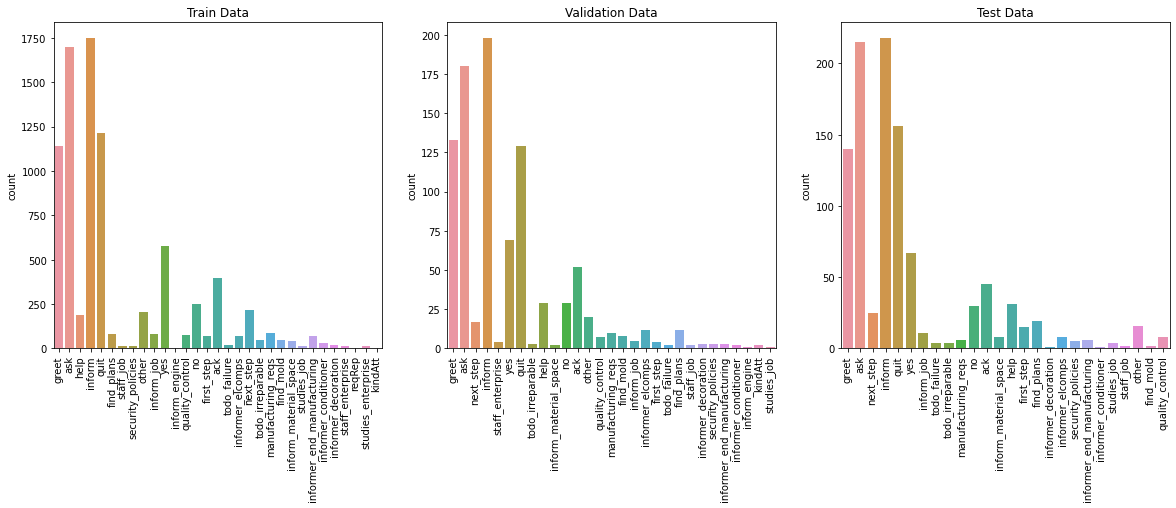

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# create figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# plot train data
chart = sns.countplot(x = dataset['train']["Dialogue_Act"], ax=axs[0])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
axs[0].set_title("Train Data")

# plot validation data
chart = sns.countplot(x = dataset['validation']["Dialogue_Act"], ax=axs[1])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
axs[1].set_title("Validation Data")

# plot test data
chart = sns.countplot(x = dataset['test']["Dialogue_Act"], ax=axs[2])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
axs[2].set_title("Test Data")

# display the plot
plt.show()

We can observe a disproportion of the labels in all the splits of the `loria` dataset. We would like to balance the labels afterwards.